loan_amnt:Loan amount\	
term:The number of payments in months.Values:36 or 60.\
int_rate:Interest Rate\
installment:The monthly payment\
grade:LC assigned loan grade\
sub_grade:LC assigned loan subgrade\
emp_title:job title\
emp_length:Employment length in years.Values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.\
home_ownership:The home ownership status.Values: RENT, OWN, MORTGAGE, OTHER\
annual_inc:Annual income\
verification_status:Indicates if income was verified by LC, not verified, or if the income source was verified\
issue_d:The month which the loan was funded\
loan_status:Current status of the loan\
purpose:A category provided by the borrower for the loan request.\
title:The loan title provided by the borrower\
zip_code:The first 3 numbers of the zip code\
addr_state:The state\
dti:total monthly debt payments-mortgage-requested LC loan/monthly income.\
earliest_cr_line:The month the borrower's earliest credit line was opened\
open_acc:The number of open credit lines in the borrower's credit file.\
pub_rec:Number of derogatory public records\
revol_bal:Total credit revolving balance\
revol_util:Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.\
total_acc:The total number of credit lines currently in the borrower's credit file\
initial_list_status:The initial listing status.Values:W, F\
application_type:Values:individual or joint application\
mort_acc:Number of mortgage accounts
pub_rec_bankruptcies:Number of bankruptcies\

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
loans= pd.read_csv('lending_club_loan_two.csv')

In [4]:
pd.options.display.max_columns = None
loans.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [73]:
loans.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

## Exploratory Data Analysis

C:\Users\ECEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

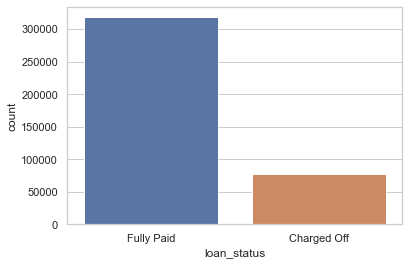

In [16]:
sns.set(style='whitegrid')
sns.countplot(loans['loan_status'])

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

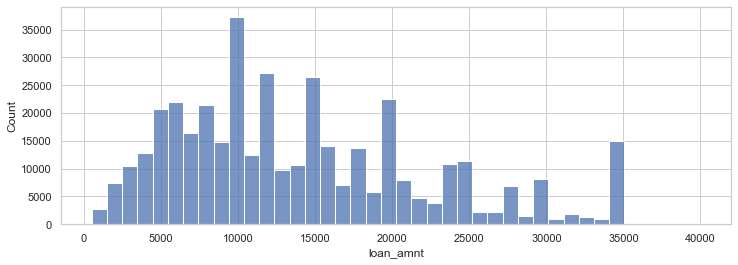

In [17]:
plt.figure(figsize=(12,4))
sns.histplot(loans['loan_amnt'],bins=40)

<AxesSubplot:>

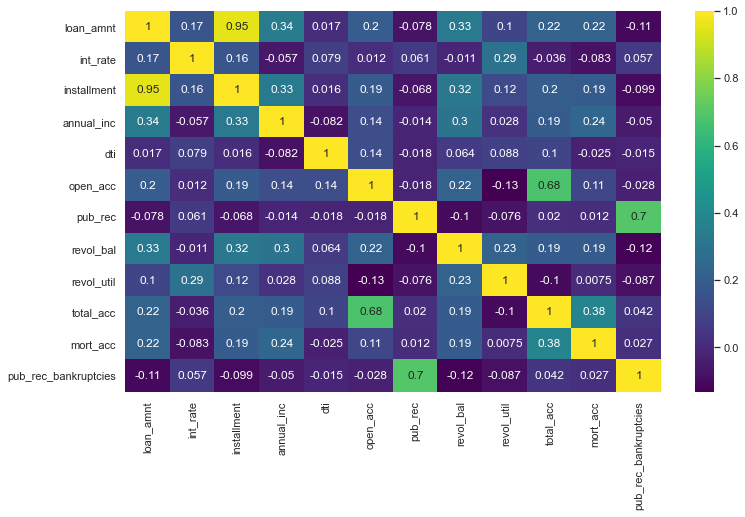

In [18]:
plt.figure(figsize=(12,7))
sns.heatmap(loans.corr(),annot=True,cmap='viridis')

In [23]:
loans[loans['loan_status']=='Charged Off'].describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,77673.000000,77673.000000,77673.000000,7.767300e+04,77673.000000,77673.000000,77673.000000,7.767300e+04,77610.000000,77673.000000,72123.000000,77586.000000
mean,15126.300967,15.882587,452.703110,6.753554e+04,19.656346,11.602513,0.199606,1.539045e+04,57.869824,24.984152,1.501213,0.128412
std,8505.090557,4.388135,249.096609,5.830346e+04,36.781068,5.288507,0.648283,1.820339e+04,23.492176,11.913692,1.974353,0.368853
min,1000.000000,5.320000,21.620000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8525.000000,12.990000,274.860000,4.200000e+04,13.330000,8.000000,0.000000,6.150000e+03,41.200000,16.000000,0.000000,0.000000
50%,14000.000000,15.610000,399.060000,5.900000e+04,19.340000,11.000000,0.000000,1.127700e+04,59.300000,23.000000,1.000000,0.000000
75%,20000.000000,18.640000,585.670000,8.000000e+04,25.550000,14.000000,0.000000,1.948500e+04,76.200000,32.000000,2.000000,0.000000
max,40000.000000,30.990000,1527.000000,8.706582e+06,9999.000000,76.000000,86.000000,1.030826e+06,148.000000,151.000000,23.000000,8.000000


In [24]:
loans[loans['loan_status']=='Fully Paid'].describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,318357.000000,318357.000000,318357.000000,3.183570e+05,318357.000000,318357.000000,318357.000000,3.183570e+05,318144.000000,318357.000000,286112.000000,317909.000000
mean,13866.878771,13.092105,426.761866,7.582995e+04,16.824010,11.240067,0.172966,1.595533e+04,52.796918,25.519800,1.892836,0.119997
std,8302.319699,4.319105,250.861622,6.231599e+04,8.500979,5.097647,0.497637,2.113219e+04,24.578304,11.878117,2.182456,0.352992
min,500.000000,5.320000,16.080000,6.000000e+02,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,7500.000000,9.910000,244.460000,4.605053e+04,10.870000,8.000000,0.000000,5.992000e+03,34.600000,17.000000,0.000000,0.000000
50%,12000.000000,12.990000,369.510000,6.500000e+04,16.340000,10.000000,0.000000,1.115800e+04,53.700000,24.000000,1.000000,0.000000
75%,19225.000000,15.610000,562.890000,9.000000e+04,22.290000,14.000000,0.000000,1.965700e+04,72.000000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,7.600000e+06,1622.000000,90.000000,24.000000,1.743266e+06,892.300000,150.000000,34.000000,8.000000


C:\Users\ECEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='count'>

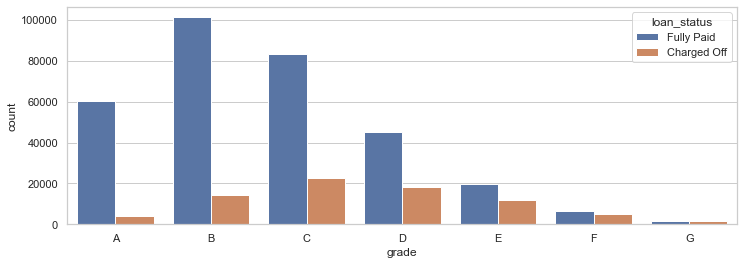

In [34]:
plt.figure(figsize=(12,4))
grade_order = sorted(loans['grade'].unique())
sns.countplot(loans['grade'],hue=loans['loan_status'],order=grade_order)


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

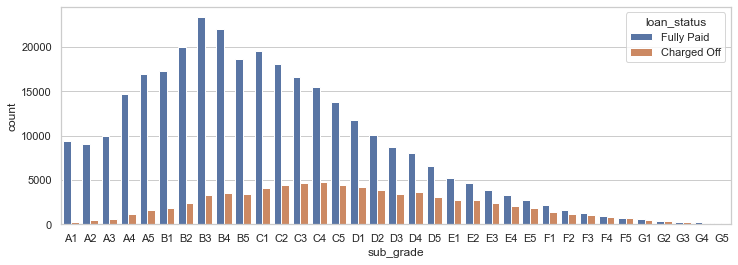

In [33]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(loans['sub_grade'].unique())
sns.countplot(x='sub_grade',data=loans,order = subgrade_order,hue='loan_status')

[Text(0, 0, 'vacation'),
 Text(1, 0, 'debt_consolidation'),
 Text(2, 0, 'credit_card'),
 Text(3, 0, 'home_improvement'),
 Text(4, 0, 'small_business'),
 Text(5, 0, 'major_purchase'),
 Text(6, 0, 'other'),
 Text(7, 0, 'medical'),
 Text(8, 0, 'wedding'),
 Text(9, 0, 'car'),
 Text(10, 0, 'moving'),
 Text(11, 0, 'house'),
 Text(12, 0, 'educational'),
 Text(13, 0, 'renewable_energy')]

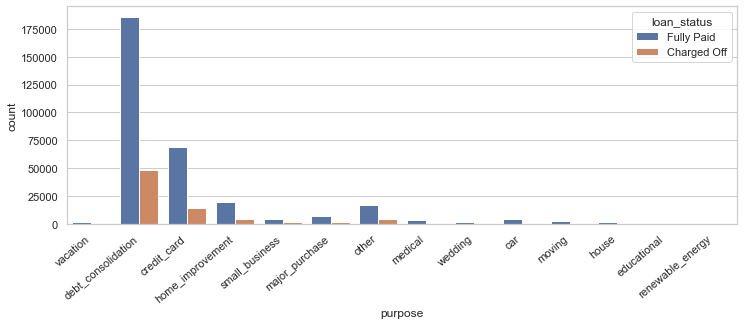

In [196]:
plt.figure(figsize=(12,4))
ax=sns.countplot(x='purpose',data=loans,hue='loan_status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") 

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

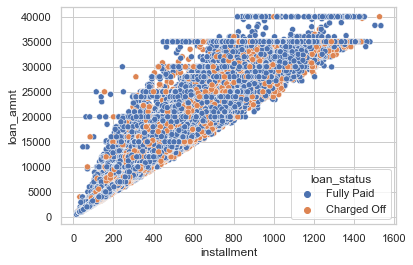

In [31]:
sns.scatterplot(x='installment',y='loan_amnt',data=loans,hue='loan_status')

In [5]:
loans=pd.get_dummies(loans,columns=['loan_status'])

In [6]:
loans.drop('loan_status_Charged Off',axis=1,inplace=True)

In [7]:
loans['emp_title'].value_counts()

Teacher                           4389
Manager                           4250
Registered Nurse                  1856
RN                                1846
Supervisor                        1830
                                  ... 
Schwartz Oilfield Services Inc       1
VP Quality/Risk/Org Support          1
Sr Transportation Planner            1
Electric Engineer Foreman            1
County of Henrico, VA                1
Name: emp_title, Length: 173105, dtype: int64

There are too many unique occupations to convert it to numerical values so i will drop this column.

In [8]:
loans.drop('emp_title',axis=1,inplace=True)

In [9]:
loans['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [10]:
loans['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

Title column and purpose column has similar information.I will frop title column

In [11]:
loans.drop('title',axis=1,inplace=True)

To fill in the mort_acc column i will check it's correlation with other columns

In [12]:
loans.corr()['mort_acc'].sort_values()

int_rate                 -0.082583
dti                      -0.025439
revol_util                0.007514
pub_rec                   0.011552
pub_rec_bankruptcies      0.027239
loan_status_Fully Paid    0.073111
open_acc                  0.109205
installment               0.193694
revol_bal                 0.194925
loan_amnt                 0.222315
annual_inc                0.236320
total_acc                 0.381072
mort_acc                  1.000000
Name: mort_acc, dtype: float64

I will fill Nan mort_acc values with mean of mor_acc values sharing the same total_acc value

In [13]:
mean_mort_acc=loans.groupby('total_acc').mean()['mort_acc']

In [14]:
mean_mort_acc[5.0]

0.10328947368421053

In [15]:
def fillmort(mort_acc,total_acc):
    if np.isnan(mort_acc):
        return mean_mort_acc[total_acc]
    else:
        return mort_acc   

In [16]:
loans['mort_acc']=loans.apply(lambda x:fillmort(x['mort_acc'],x['total_acc']),axis=1)

revol_util and the pub_rec_bankruptcies have missing data points, but they are less than 0.5% of the total data.So iwill drop these columns.

In [17]:
loans.dropna(inplace=True)

### Handling Categorical Varibles

In [18]:
pd.options.display.max_columns = None
loans.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status_Fully Paid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,Jan-2015,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,Jan-2015,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,Nov-2014,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,Apr-2013,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


For term i will drop 'months'

In [19]:
loans['term']=loans['term'].apply(lambda x:x[1:3])

In [20]:
loans['home_ownership'].value_counts()

MORTGAGE    189448
RENT        153075
OWN          34268
OTHER          107
NONE            28
ANY              3
Name: home_ownership, dtype: int64

I will change none and any to otherto decrease the number of dummy variables

In [21]:
loans['home_ownership']=loans['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [22]:
loans=pd.get_dummies(loans,columns=['home_ownership'],drop_first=True)

For issue_d and earliest_cr_line i will seperate it into month and year

In [23]:
loans[['issue_month','issue_year']]=loans['issue_d'].str.split('-', expand=True)
loans.drop('issue_d',inplace=True,axis=1)

In [24]:
loans[['earliest_cr_month','iearliest_cr_year']]=loans['earliest_cr_line'].str.split('-', expand=True)
loans.drop('earliest_cr_line',inplace=True,axis=1)

In [25]:
loans['issue_month']=loans['issue_month'].map({'Jan': 1, 'Feb' : 2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12})
loans['earliest_cr_month']=loans['earliest_cr_month'].map({'Jan' : 1, 'Feb' : 2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12})

Information in grade category already exist in subgrade category so i will drop this column.

In [26]:
loans.drop('grade',inplace=True,axis=1)

Converting 'sub_grade','verification_status', 'application_type','initial_list_status','purpose' into dummy variables

In [27]:
loans= pd.get_dummies(loans,columns=['sub_grade','verification_status', 'application_type','initial_list_status','purpose' ],drop_first=True)

For address, i will take the zipcode

In [28]:
loans['zip_code'] = loans['address'].apply(lambda x:x[-5:])
loans.drop('address',inplace=True,axis=1)

For emp_length, i will drop years\
turn <1 year to 0\
and 10+ to 11

In [29]:
def year_change(emp_length):
    if emp_length=='10+ years':
        return 11
    elif emp_length=='< 1 year':
        return 0
    else:
        return emp_length[0:1]
    

In [30]:
loans['emp_length'] = loans['emp_length'].apply(lambda x:year_change(x))

In [31]:
pd.options.display.max_columns = None
loans.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_status_Fully Paid,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,issue_month,issue_year,earliest_cr_month,iearliest_cr_year,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code
0,10000.0,36,11.44,329.48,11,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,1,0,0,1,1,2015,6,1990,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,22690
1,8000.0,36,11.99,265.68,4,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1,0,0,0,1,2015,7,2004,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,05113
2,15600.0,36,10.49,506.97,0,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,1,0,0,1,1,2015,8,2007,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,05113
3,7200.0,36,6.49,220.65,6,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,1,0,0,1,11,2014,9,2006,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,00813
4,24375.0,60,17.27,609.33,9,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0,0,0,0,4,2013,3,1999,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11650


In [32]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376929 entries, 0 to 396029
Data columns (total 75 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            376929 non-null  float64
 1   term                                 376929 non-null  object 
 2   int_rate                             376929 non-null  float64
 3   installment                          376929 non-null  float64
 4   emp_length                           376929 non-null  object 
 5   annual_inc                           376929 non-null  float64
 6   dti                                  376929 non-null  float64
 7   open_acc                             376929 non-null  float64
 8   pub_rec                              376929 non-null  float64
 9   revol_bal                            376929 non-null  float64
 10  revol_util                           376929 non-null  float64
 11  total_acc    

### Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = loans.drop('loan_status_Fully Paid',axis=1).values
y = loans['loan_status_Fully Paid'].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

### Normalizing the Data

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [41]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Creating the Model

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [43]:
model = Sequential()

In [44]:
# input layer
model.add(Dense(74,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(37, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [45]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1178/1178 [==============================] - 4s 3ms/step - loss: 0.4047 - val_loss: 0.3677
Epoch 2/25
1178/1178 [==============================] - 3s 3ms/step - loss: 0.3638 - val_loss: 0.3573
Epoch 3/25
1178/1178 [==============================] - 3s 3ms/step - loss: 0.3568 - val_loss: 0.3556
Epoch 4/25
1178/1178 [==============================] - 3s 3ms/step - loss: 0.3543 - val_loss: 0.3543
Epoch 5/25
1178/1178 [==============================] - 4s 3ms/step - loss: 0.3475 - val_loss: 0.3349
Epoch 6/25
1178/1178 [==============================] - 4s 3ms/step - loss: 0.3180 - val_loss: 0.2950
Epoch 7/25
1178/1178 [==============================] - 3s 3ms/step - loss: 0.2925 - val_loss: 0.2808
Epoch 8/25
1178/1178 [==============================] - 4s 3ms/step - loss: 0.2840 - val_loss: 0.2775
Epoch 9/25
1178/1178 [==============================] - 3s 3ms/step - loss: 0.2808 - val_loss: 0.2768
Epoch 10/25
1178/1178 [==============================] - 3s 3ms/step - loss: 0.278

### Evaluating Model Performance

In [46]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

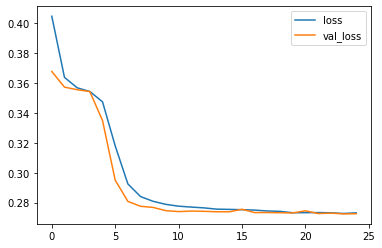

In [47]:
losses[['loss','val_loss']].plot()

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

In [52]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.19      1.00      0.32     14609
           1       0.00      0.00      0.00     60777

    accuracy                           0.19     75386
   macro avg       0.10      0.50      0.16     75386
weighted avg       0.04      0.19      0.06     75386



C:\Users\ECEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ECEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ECEM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
